In [1]:
import vnstock as vns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("VN30 Stocks 2020 - 2023 - Up to June 2024", index_col = 0)

In [3]:
df

,SSI,BCM,VHM,VIC,VRE,BVH,POW,GAS,ACB,BID,...,VPB,HPG,GVR,MSN,VNM,SAB,VJC,MWG,PLX,FPT
time,,,,,,,,,,,,,,,,,,,,,
2020-01-02,8740,28160.0,62600,102210,34350,61390,11352,68440,7950.0,32369,...,6880,9940,10150.0,46160,81400,100180,148000,37730,46760,25000
2020-01-03,8670,27880.0,62820,102477,34600,61040,11161,68590,7950.0,32229,...,6840,10000,10500.0,46570,81660,100440,148000,37170,47250,24580
2020-01-06,8640,27590.0,61500,101766,33650,60150,10827,70760,7780.0,31610,...,6670,9940,10320.0,45830,81040,100080,146000,36990,47430,24320
2020-01-07,8670,26830.0,61790,101943,33950,60060,10731,70250,7780.0,32229,...,6820,9810,10050.0,46000,81800,100180,145900,37270,46760,24790
2020-01-08,8430,26640.0,60830,101588,32700,58720,10254,70180,7640.0,32509,...,6730,9710,9700.0,45350,82000,99810,144800,36370,46110,24230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,35100,62100.0,39800,45050,22300,46400,12100,81000,24740.0,48900,...,18000,28900,35250.0,73500,66100,58500,109000,60000,41300,114690
2024-05-28,35600,62700.0,39950,45050,22450,47000,12450,81900,24910.0,49100,...,18050,29150,35600.0,75500,66800,61000,109600,61500,41550,118320
2024-05-29,35200,61900.0,39450,44400,22150,45600,12550,82200,24570.0,48600,...,18050,28600,34900.0,75000,66300,60500,107900,60500,41500,117190


In [4]:
ticker = 'FPT'

In [5]:
df = df[ticker]
df = df.dropna()

In [6]:
length_data = len(df)    
length_train = round(length_data * 0.6)  
length_validation = round(length_data * 0.2)  
length_test = length_data - length_train - length_validation

#Validation set is for tuning parameters and test set is for actual testing

In [7]:
train_data = df[:length_train]
validation_data = df[length_train:length_train+length_validation]
test_data = df[length_train+length_validation:]

In [8]:
train_data = train_data.to_frame()
validation_data = validation_data.to_frame()
test_data = test_data.to_frame()

In [9]:
# plt.subplots(figsize =(30,12))
# plt.plot(train_data.index, train_data[ticker], label = "train_data", color = "b")
# plt.plot(validation_data.index, validation_data[ticker], label = "validation_data", color = "g")
# plt.plot(test_data.index, test_data[ticker], label = "validation_data", color = "y")
# plt.xlabel("Days")
# plt.ylabel("Open price")
# plt.title("Train-validation-test sets")
# plt.legend(fontsize = 25)
# plt.show()

In [10]:
df_train = train_data.values

In [11]:
df_train = np.reshape(df_train, (-1,1))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

df_train_scaled = scaler.fit_transform(df_train)

df_train_scaled.shape

(661, 1)

In [13]:
X_train = []
y_train = []

time_step = 20

for i in range(time_step, length_train):
    X_train.append(df_train_scaled[i-time_step:i,0])
    y_train.append(df_train_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)


In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, LSTM
from keras.layers import Dropout

# keras.utils.set_random_seed(622)

unit_num = 256
hidden_layers = 1
# initializing the RNN
regressor = Sequential()


for i in range(hidden_layers - 1):
    regressor.add(
        LSTM(units = unit_num, 
                activation = "tanh", 
                return_sequences = True,
                )
                )

    regressor.add(
        Dropout(0.2)
                )


regressor.add(
    LSTM(units = unit_num)
             )

regressor.add(
    Dropout(0.2)
             )
# regressor.add(Dense(units = 25))

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_absolute_error",
    metrics = ["mean_absolute_error"])


In [16]:
# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1857 - mean_absolute_error: 0.1857
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0672 - mean_absolute_error: 0.0672
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0329 - mean_absolute_error: 0.0329
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0300 - mean_absolute_error: 0.0300
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0291 - mean_absolute_error: 0.0291
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0361 - mean_absolute_error: 0.0361
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0331 - mean_absolute_error: 0.0331
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0434 - mean_absolute_error: 0.0434
Epoch 10/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0254 - mean_absolute_error: 0.0254
Epoch 11/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 

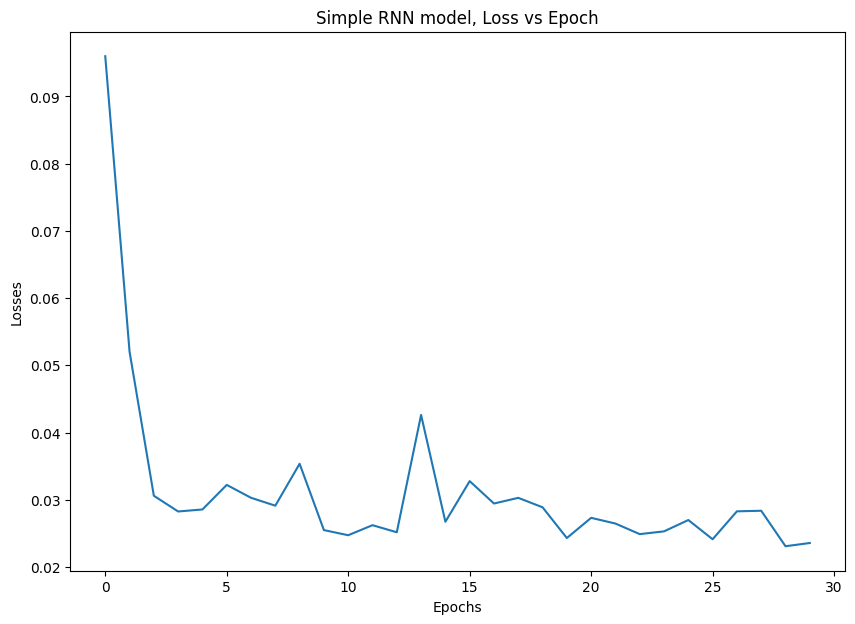

In [17]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

In [18]:
y_train_pred = regressor.predict(X_train)  
y_train_pred = scaler.inverse_transform(y_train_pred) 
y_train_pred.shape

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


(641, 1)

In [19]:
y_train = scaler.inverse_transform(y_train) 

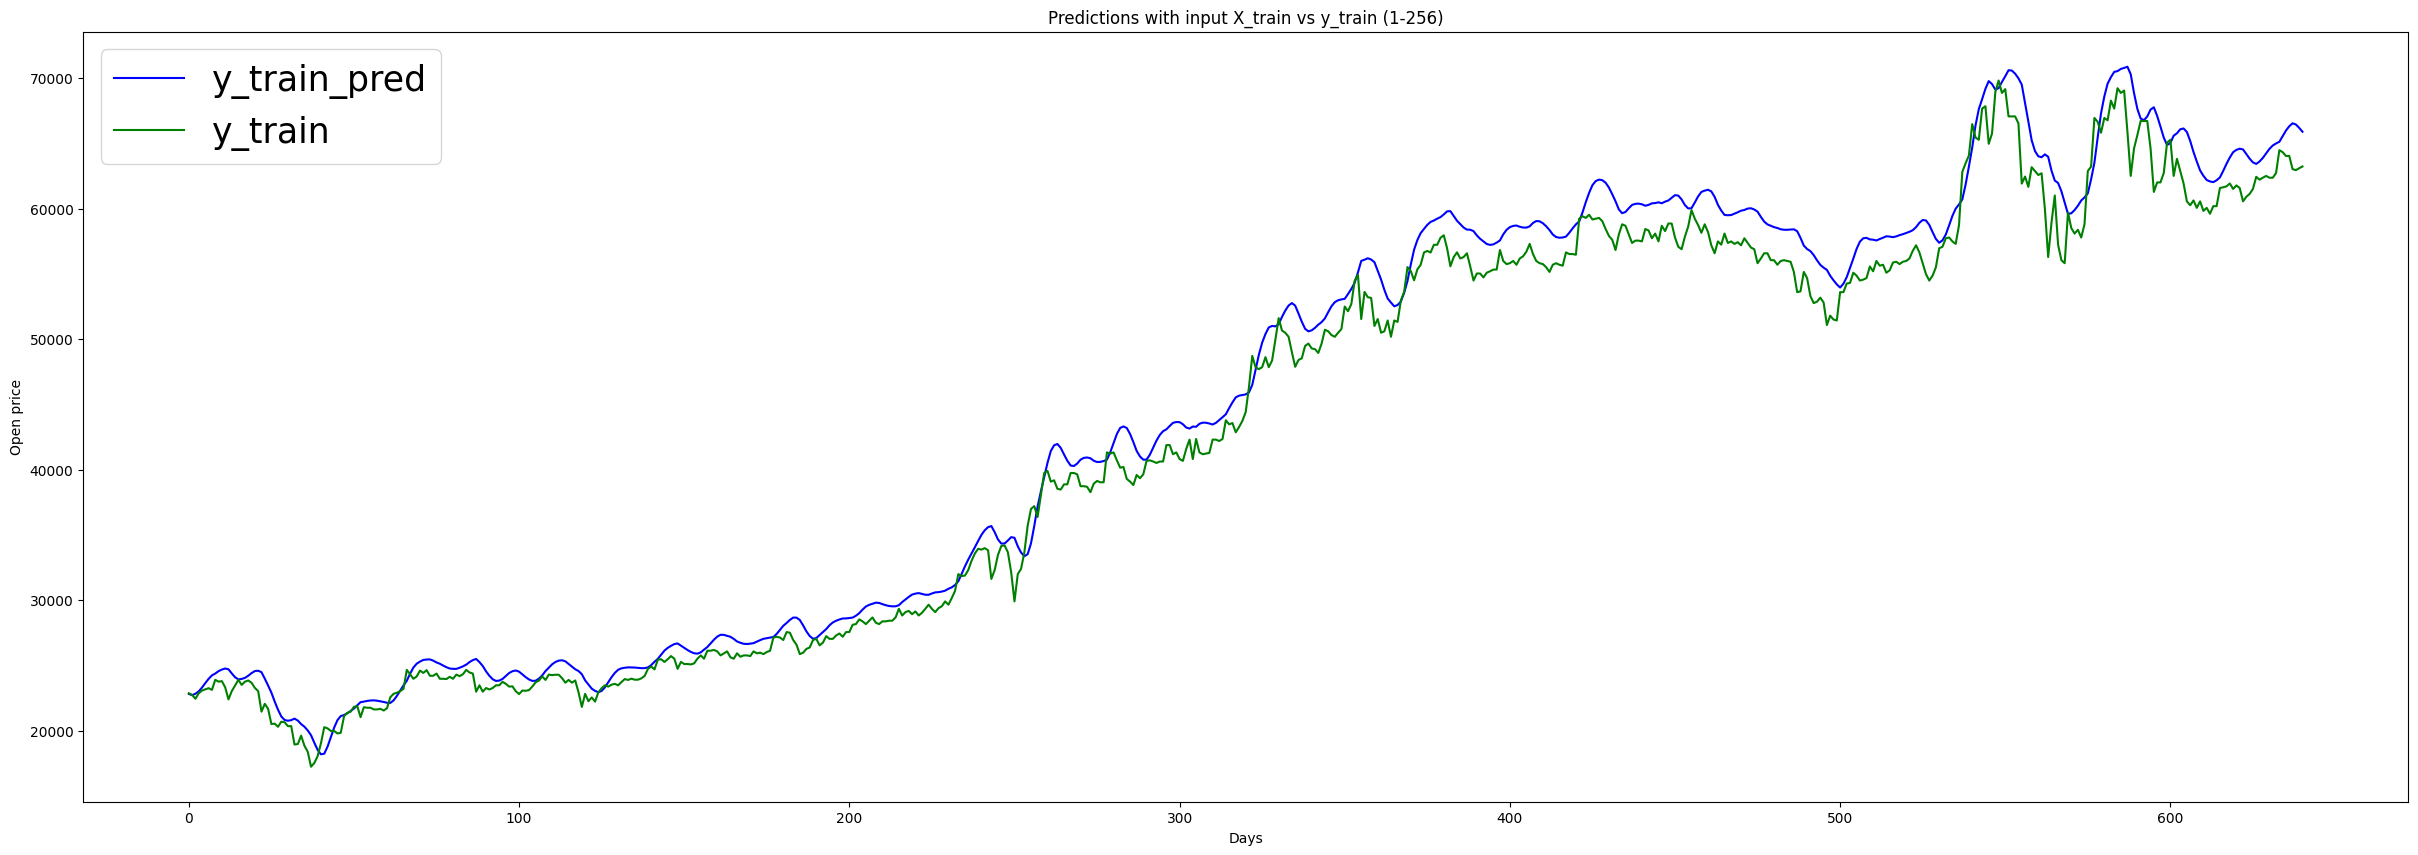

In [20]:
plt.figure(figsize = (30,10))
plt.plot(y_train_pred, color = "b", label = "y_train_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title(f"Predictions with input X_train vs y_train ({hidden_layers}-{unit_num})")
plt.legend(fontsize = 25)
plt.show()


In [21]:
df_validation = validation_data.values 
df_validation = np.reshape(df_validation, (-1,1)) 

scaled_df_validation =  scaler.transform(df_validation)  



X_validation = []
y_validation = []

for i in range(time_step, length_validation):
    X_validation.append(scaled_df_validation[i-time_step:i,0])
    y_validation.append(scaled_df_validation[i,0])

X_validation, y_validation = np.array(X_validation), np.array(y_validation)

X_validation = np.reshape(X_validation, (X_validation.shape[0],X_validation.shape[1],1))  
y_validation = np.reshape(y_validation, (-1,1)) 
y_validation = scaler.inverse_transform(y_validation)

In [22]:
y_validation_pred = regressor.predict(X_validation)

y_validation_pred = scaler.inverse_transform(y_validation_pred) 

y_validation_pred = pd.DataFrame(y_validation_pred, columns=['Close'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


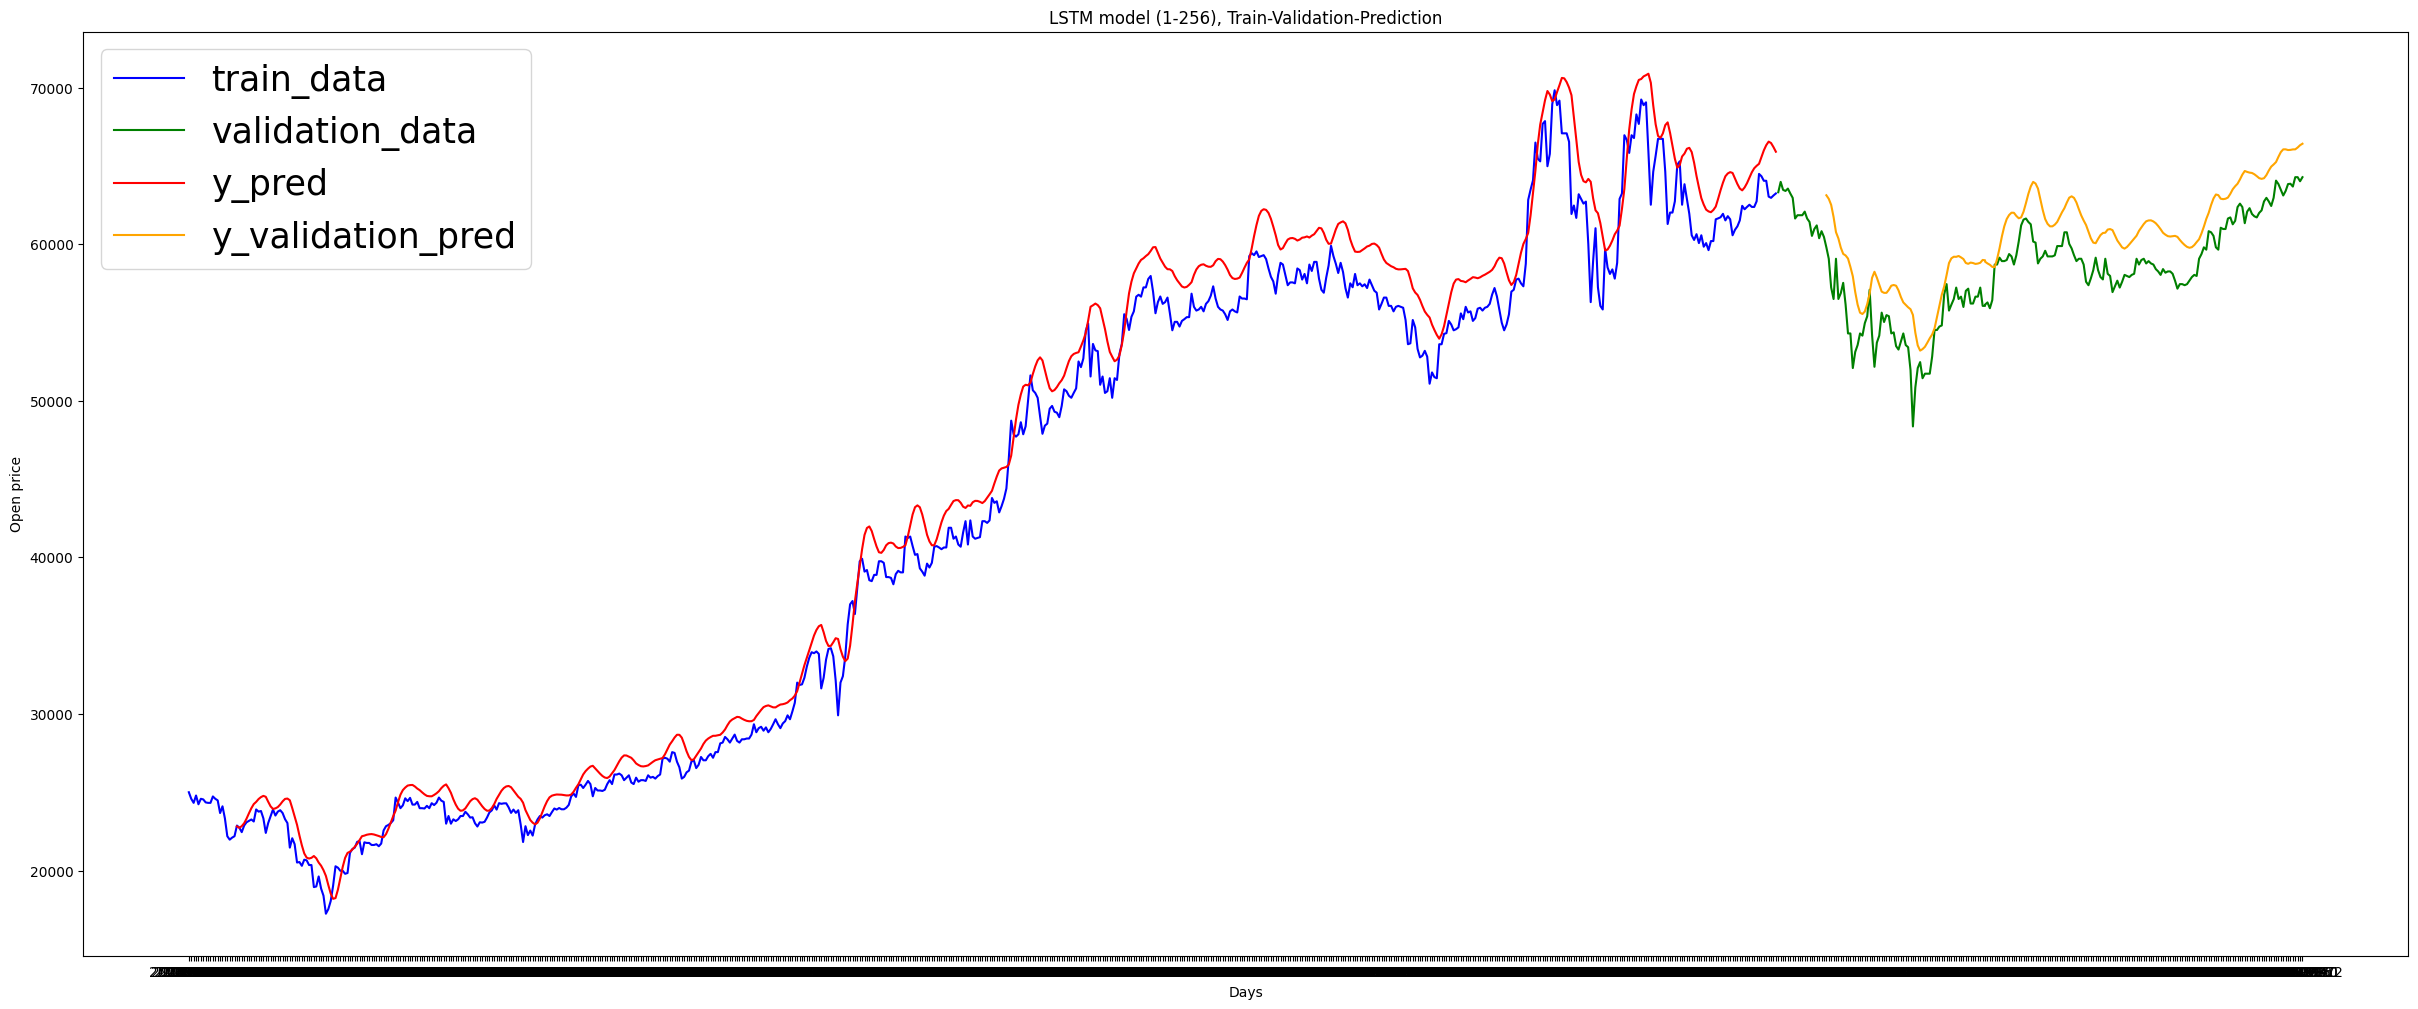

In [23]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.index, train_data[ticker], label = "train_data", color = "b")
plt.plot(validation_data.index, validation_data[ticker], label = "validation_data", color = "g")
plt.plot(train_data.index[time_step:], y_train_pred, label = "y_pred", color = "r")
plt.plot(validation_data.index[time_step:], y_validation_pred["Close"], label = "y_validation_pred", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title(f"LSTM model ({hidden_layers}-{unit_num}), Train-Validation-Prediction")
plt.legend(fontsize = 25)
plt.show()

In [24]:
true_price = [i[0] for i in validation_data.values[time_step:]]
predicted_price = [i for i in y_validation_pred["Close"]]

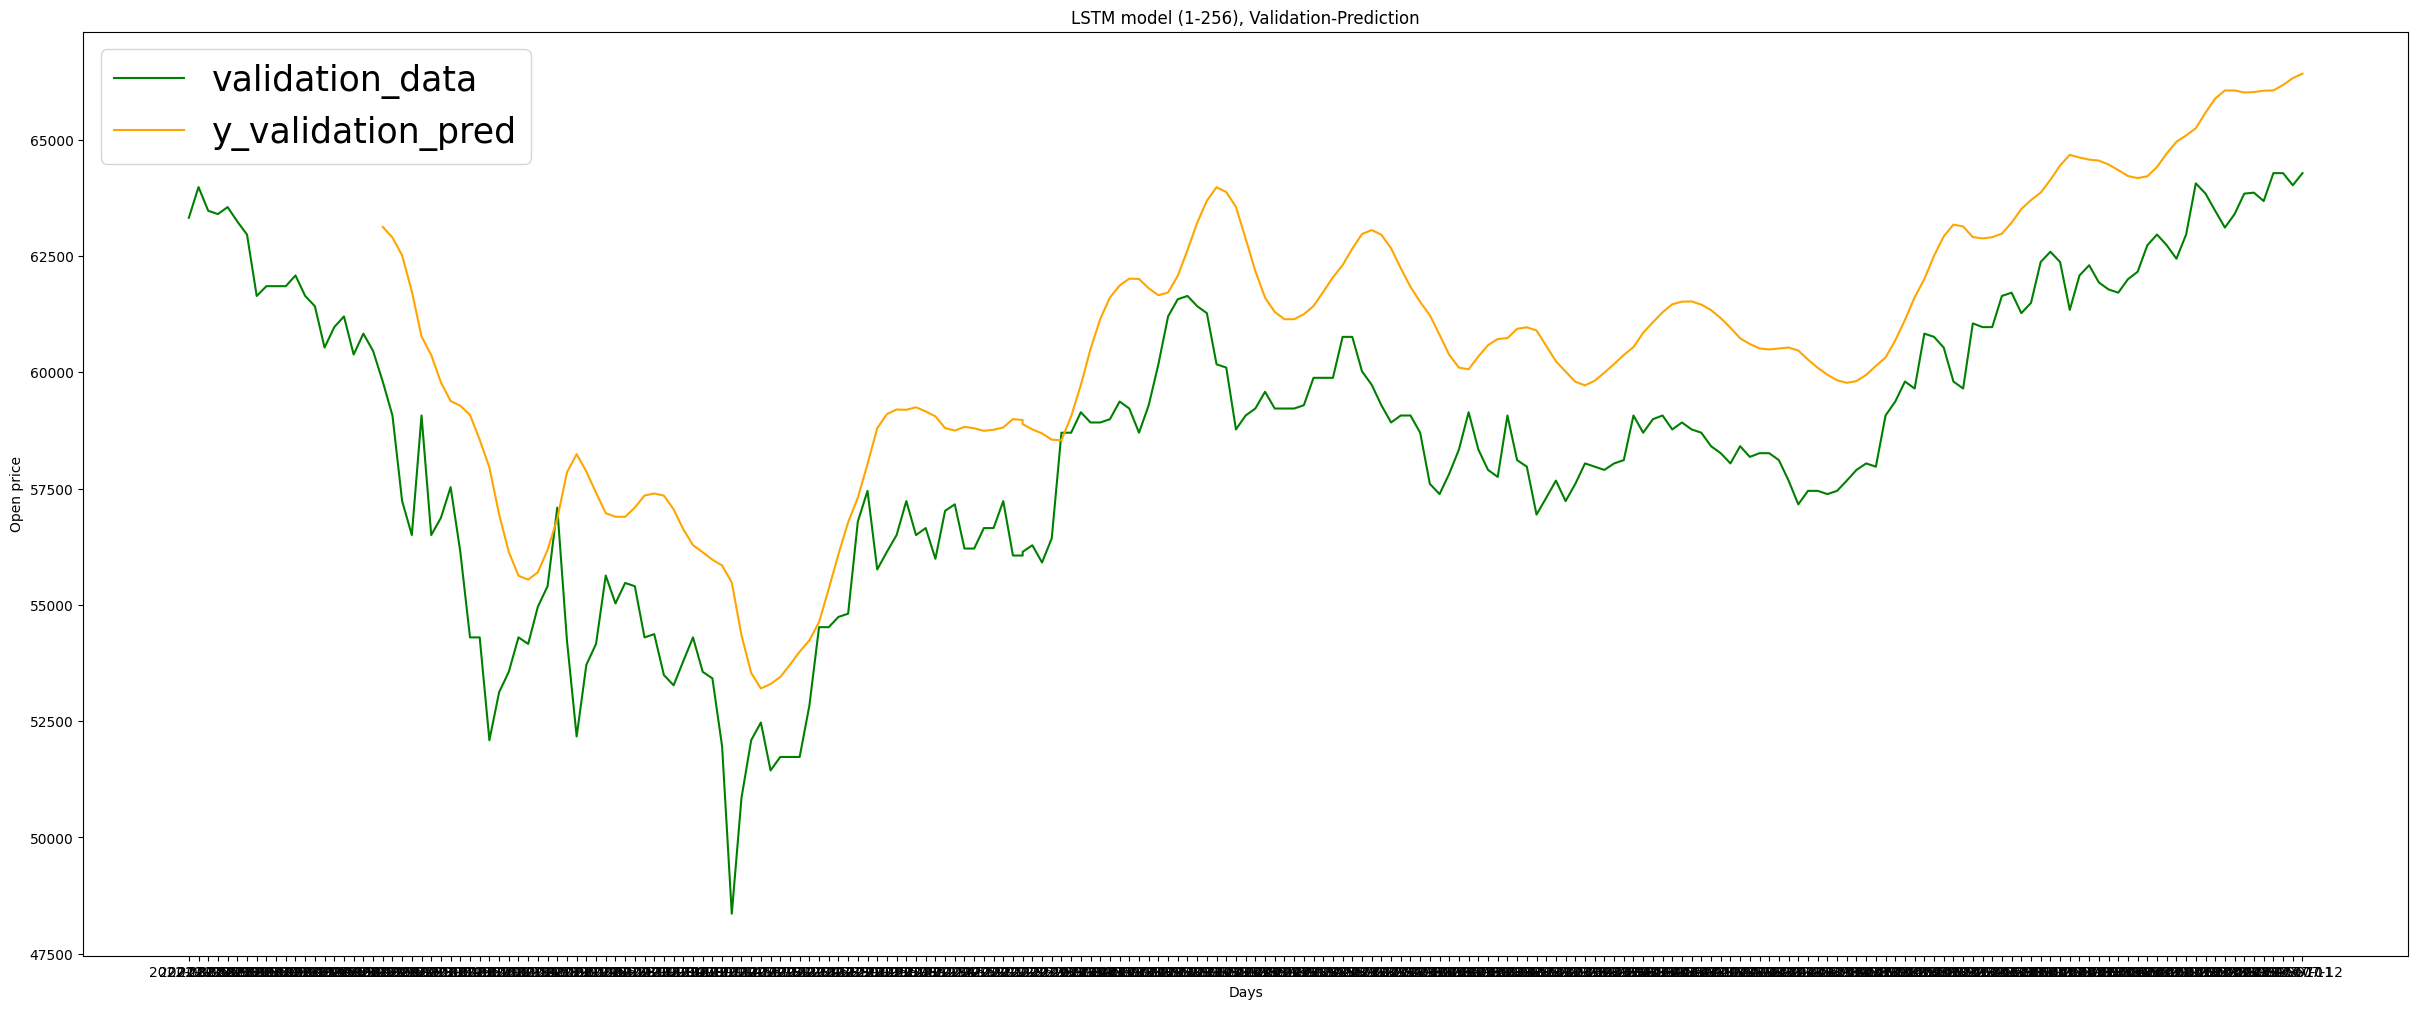

In [25]:
plt.subplots(figsize =(30,12))
plt.plot(validation_data.index, validation_data[ticker], label = "validation_data", color = "g")
plt.plot(validation_data.index[time_step:], y_validation_pred, label = "y_validation_pred", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title(f"LSTM model ({hidden_layers}-{unit_num}), Validation-Prediction")
plt.legend(fontsize = 25)
plt.show()

In [26]:
mse = np.mean(np.square(np.array([true_price]) - np.array([predicted_price])))

# count = 0
# temp = 0
# Chạy vài lần rồi lấy trung bình

    
# count += 1
# temp += mse
# print(mse, count, temp/count)

mse

6814960.685966568

In [27]:

# count = 0
# temp = 0

In [28]:
# short_window = 5
# long_window = 25
# # Calculate moving averages
# y_validation = pd.DataFrame(y_validation, columns = ["Close"])
# # Tính toán đường trung bình di động ngắn hạn và dài hạn
# y_validation['short_mavg'] = y_validation['Close'].rolling(window=short_window, min_periods=1).mean()
# y_validation['long_mavg'] = y_validation['Close'].rolling(window=long_window, min_periods=1).mean()

# # Plot close price and moving averages
# plt.subplots(figsize =(30,12))
# plt.title('Long and Short Moving Averages', fontsize=14)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.plot(y_validation['Close'], label='Close')
# plt.plot(y_validation['short_mavg'], label=f'{short_window}-Day Moving Average')
# plt.plot(y_validation['long_mavg'], label=f'{long_window}-Day Moving Average')
# plt.legend()

In [29]:
# # Tại mỗi điểm thì short_mavg và long_avg được tính từ data thật và prediction cho ngày tiếp theo.

# for i in range(1, len(y_validation)):
#     temp1 = y_validation['short_mavg'][i-1]
#     temp2 = y_validation['long_mavg'][i-1]

#     y_validation.loc[i-1, "short_mavg"] = temp1 * (min(i, short_window)/(min(i,short_window) + 1)) \
#                                     + y_validation_pred['Close'][i] / (min(i,short_window) + 1)
    
#     y_validation.loc[i-1, "long_mavg"] = temp2 * (min(i, long_window)/(min(i,long_window) + 1)) \
#                                     + y_validation_pred['Close'][i] / (min(i,long_window) + 1)
    

In [30]:

# # Take long positions
# y_validation['long_positions'] = np.where(y_validation['short_mavg'] > y_validation['long_mavg'], 1, 0)

# # Take short positions
# y_validation['short_positions'] = np.where(y_validation['short_mavg'] < y_validation['long_mavg'], -1, 0)
# y_validation['positions'] = y_validation['long_positions'] + y_validation['short_positions']

# buy_points2 = y_validation[(y_validation['positions'] == 1) &
# (y_validation['positions'].shift(1) <= 0)]['short_mavg']

# sell_points2 = y_validation[(y_validation['positions'] == -1) &
# (y_validation['positions'].shift(1) >= 0)]['short_mavg']

# y_validation['buy_points'] = np.where((y_validation['positions'] == 1) &
# (y_validation['positions'].shift(1) <= 0), 1, 0)

# y_validation['sell_points'] = np.where((y_validation['positions'] == -1) &
# (y_validation['positions'].shift(1) >= 0), 1, 0)



In [31]:
# plt.subplots(figsize =(30,12))
# plt.title('Long and Short Signal', fontsize=14)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.plot(y_validation['Close'], label='Real Close')
# plt.plot(y_validation['short_mavg'], label='short_mavg')
# plt.plot(y_validation['long_mavg'], label='long_mavg')
# plt.legend()
# plt.show()

In [32]:
# plt.subplots(figsize =(30,12))
# plt.title('Long and Short Signal', fontsize=14)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.plot(y_validation['Close'], label='Real Close')
# plt.plot(y_validation['short_mavg'], label='short_mavg')
# plt.plot(y_validation['long_mavg'], label='long_mavg')

# plt.plot(buy_points2.index, y_validation['Close'][buy_points2.index],
# '^', ms=15, label='Buy Signal', color='green')
# plt.plot(sell_points2.index, y_validation['Close'][sell_points2.index],
# '^', ms=15, label='Sell Signal', color='red')
# plt.legend()
# plt.show()

In [33]:
# budget = 1e7
#
# assets = [budget]
# stocks_bought = 0
# stocks_bought_history = [0]
# for index, row in y_validation.iterrows():
#     if budget < 0:
#         print("ERROR: Budget < 0")
#         break
#     if row['buy_points'] == 1:
#         stocks_bought = (budget // y_validation["Close"][index]) // 2
#         budget -=  (stocks_bought * y_validation["Close"][index])
#     elif row['sell_points'] == 1:
#         budget += stocks_bought * y_validation["Close"][index]
#         stocks_bought = 0
#     assets.append((budget + stocks_bought * y_validation["Close"][index]))

In [34]:
# plt.subplots(figsize =(30,12))
# plt.title('Investment Returns over time', fontsize=14)
# plt.xlabel('Date')
# plt.ylabel('Total Assets')
# plt.plot(assets, label='Assets')
# # plt.legend()

In [35]:
# print(f"Returns: {(assets[-1] - assets[0])/assets[0] * 100}%")

In [36]:
# future_values = []

# stock_prices = pd.DataFrame(X_validation[0], columns = [ticker])

# for i in range(len(validation_data.index[time_step:])):    
#     stock_prices_train = np.array(stock_prices.values)
#     value = regressor.predict(stock_prices_train.reshape(1, stock_prices_train.shape[0], 1))
    
#     future_values.append(value)

#     stock_prices = stock_prices.shift(-1)
#     stock_prices.loc[stock_prices.index[-1]] = value

# future_values = pd.DataFrame([scaler.inverse_transform(i)[0][0] for i in future_values], columns = [ticker])

# future_values.index = validation_data.index[time_step:]

In [37]:
# # Visualisation
# plt.subplots(figsize =(30,12))
# plt.plot(train_data.index, train_data[ticker], label = "train_data", color = "b")
# plt.plot(validation_data.index, validation_data[ticker], label = "validation_data", color = "g")
# plt.plot(train_data.index[time_step:], y_train_pred, label = "y_pred", color = "r")
# plt.plot(future_values, label = "independent prediction", color = "orange")
# plt.xlabel("Days")
# plt.ylabel("Open price")
# plt.title("LSTM model, Train-Test-Prediction")
# plt.legend(fontsize = 25)
# plt.show()

In [38]:
df_test = test_data.values 
df_test = np.reshape(df_test, (-1,1)) 

scaled_df_test =  scaler.transform(df_test)  

X_test = []
y_test = []

for i in range(time_step, length_test):
    X_test.append(scaled_df_test[i-time_step:i,0])
    y_test.append(scaled_df_test[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  
y_test = np.reshape(y_test, (-1,1)) 
y_test = scaler.inverse_transform(y_test)

In [39]:
X_test.shape

(200, 20, 1)

In [40]:
y_test_pred = regressor.predict(X_test)

y_test_pred = scaler.inverse_transform(y_test_pred) 

y_test_pred = pd.DataFrame(y_test_pred, columns=['Close'])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [41]:
# # Visualisation
# plt.subplots(figsize =(30,12))
# plt.plot(train_data.index, train_data[ticker], label = "train_data", color = "b")
# plt.plot(validation_data.index, validation_data[ticker], label = "validation_data", color = "k")
# plt.plot(train_data.index[time_step:], y_train_pred, label = "y_pred", color = "c")
# plt.plot(validation_data.index[time_step:], y_validation_pred, label = "y_validation_pred", color = "orange")
# plt.plot(test_data.index, test_data[ticker], label = "y_test", color = "m")
# plt.plot(test_data.index[time_step:], y_test_pred, label = "y_test_pred", color = "g")
# plt.xlabel("Days")
# plt.ylabel("Open price")
# plt.title(f"LSTM model ({hidden_layers}-{unit_num}), Train-Test-Prediction")
# plt.legend(fontsize = 15)
# plt.show()

In [42]:
true_price_test = [i[0] for i in test_data.values[time_step:]]
predicted_price_test = [i for i in y_test_pred["Close"]]

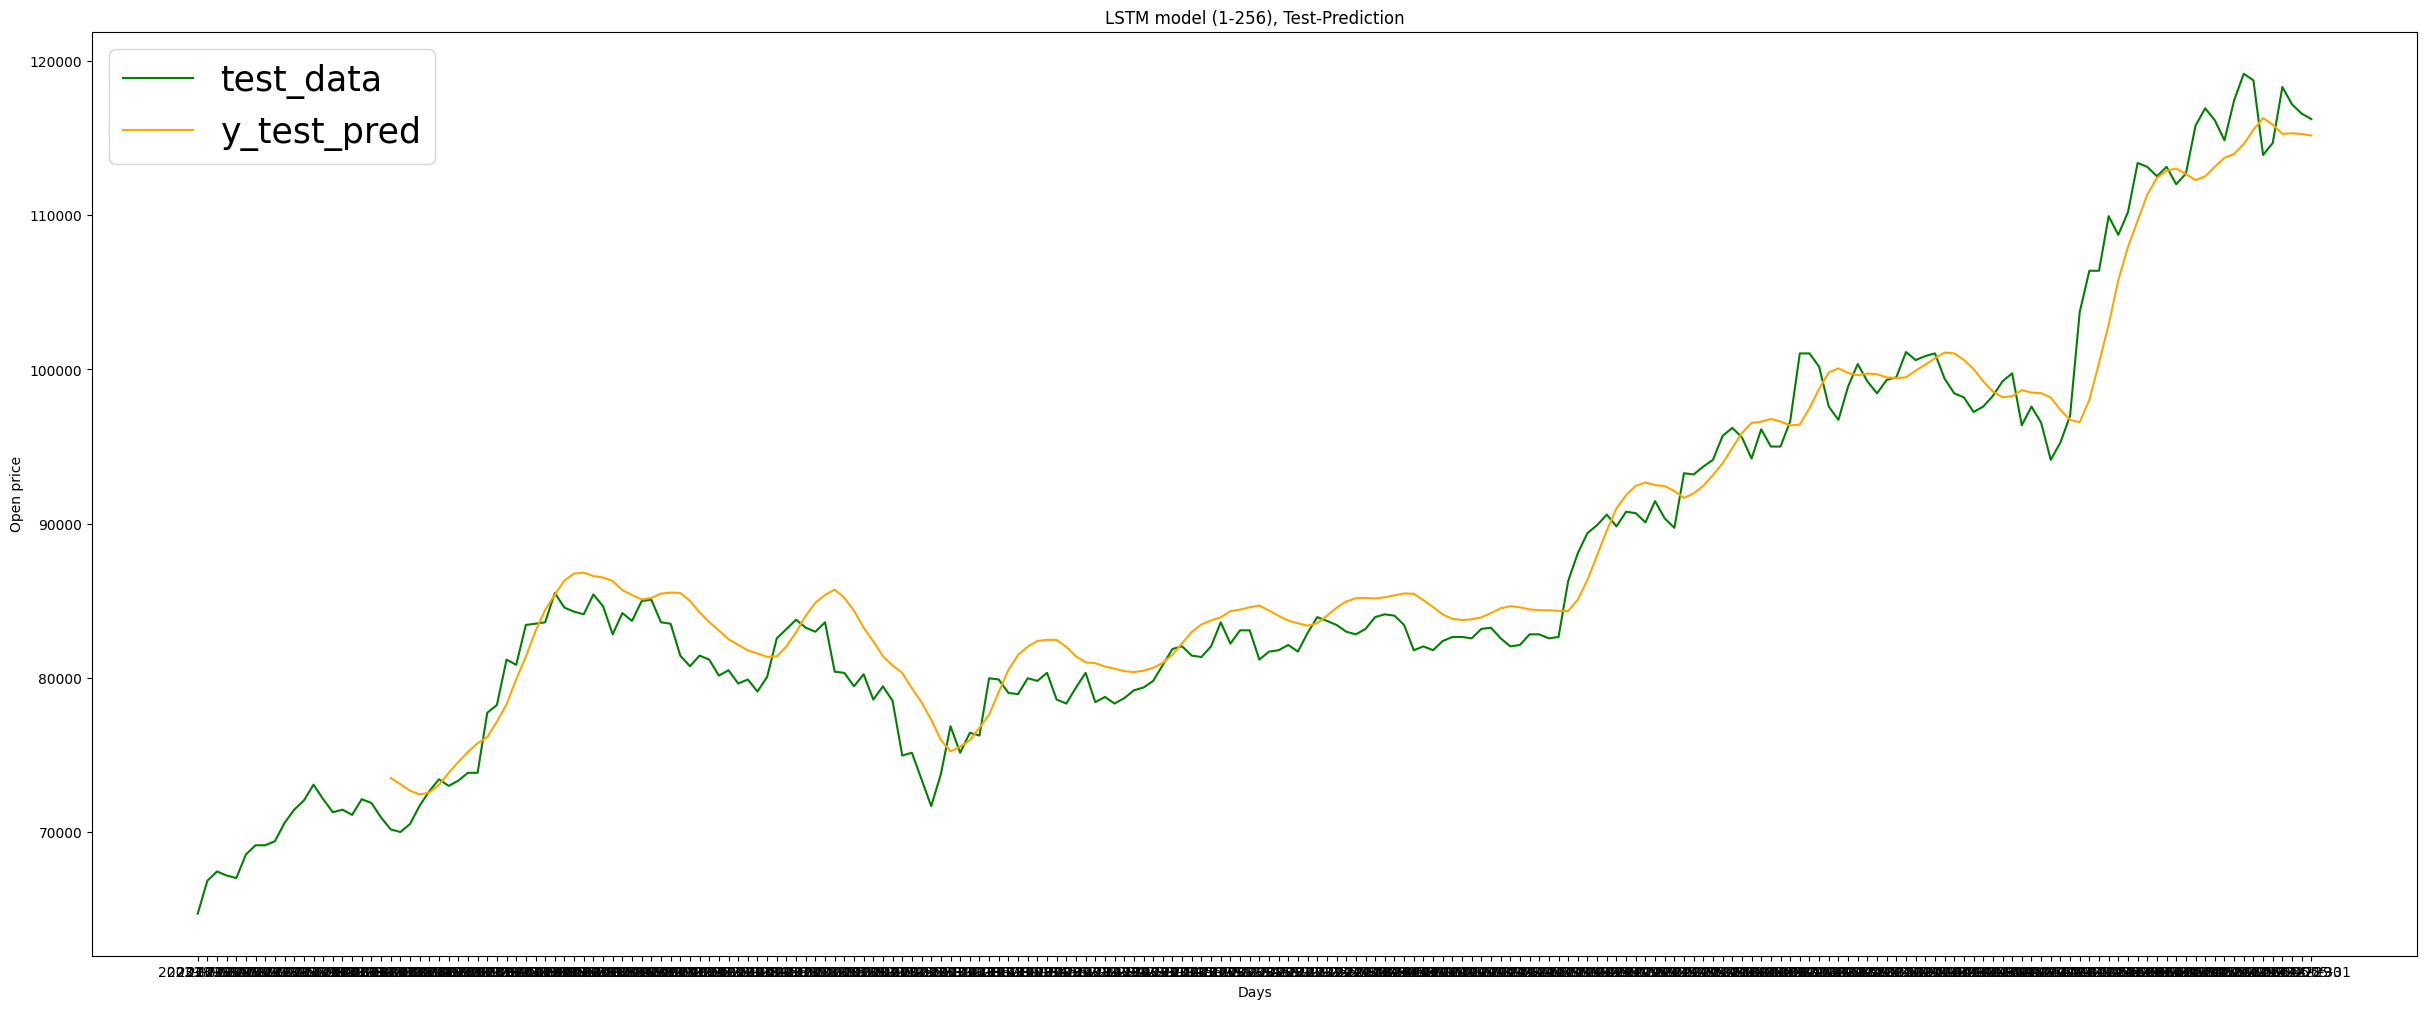

In [43]:
plt.subplots(figsize =(30,12))
plt.plot(test_data.index, test_data[ticker], label = "test_data", color = "g")
plt.plot(test_data.index[time_step:], y_test_pred, label = "y_test_pred", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title(f"LSTM model ({hidden_layers}-{unit_num}), Test-Prediction")
plt.legend(fontsize = 25)
plt.show()

In [44]:
y_test_pred

,Close
0,73502.476562
1,73103.171875
2,72680.320312
3,72432.476562
4,72561.460938
...,...
195,115877.976562
196,115279.406250
197,115318.164062
198,115271.398438


In [45]:
short_window = 5
long_window = 20
# Calculate moving averages
y_test = pd.DataFrame(y_test, columns = ["Close"])
# Tính toán đường trung bình di động ngắn hạn và dài hạn
y_test['short_mavg'] = y_test['Close'].rolling(window=short_window, min_periods=1).mean()
y_test['long_mavg'] = y_test['Close'].rolling(window=long_window, min_periods=1).mean()

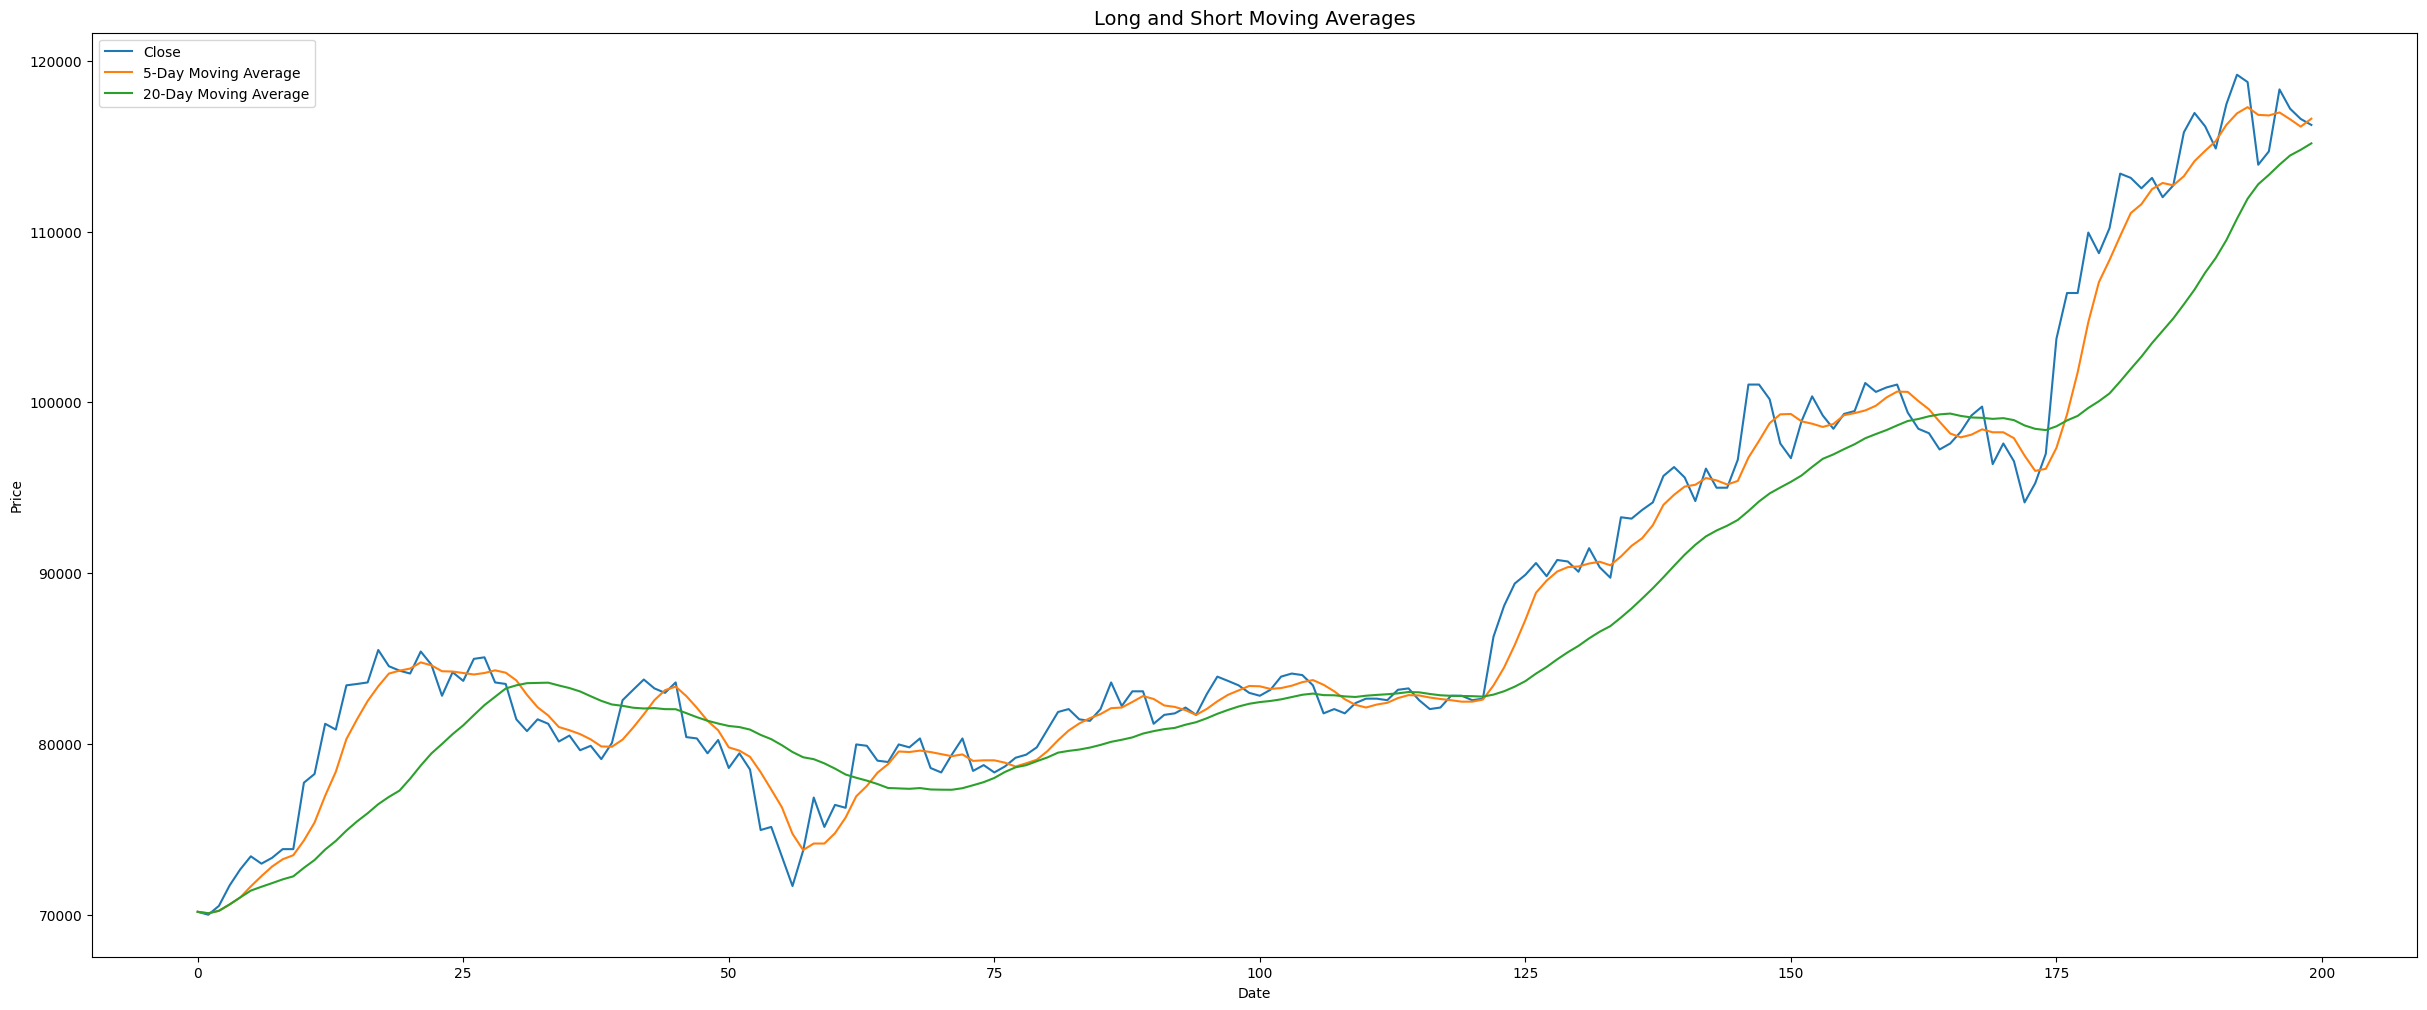

In [46]:

# Plot close price and moving averages
plt.subplots(figsize =(30,12))
plt.title('Long and Short Moving Averages', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(y_test['Close'], label='Close')
plt.plot(y_test['short_mavg'], label=f'{short_window}-Day Moving Average')
plt.plot(y_test['long_mavg'], label=f'{long_window}-Day Moving Average')
plt.legend()

In [47]:
# Tại mỗi điểm thì short_mavg và long_avg được tính từ data thật và prediction cho ngày tiếp theo.

for i in range(1, len(y_test)):
    temp1 = y_test['short_mavg'][i-1]
    temp2 = y_test['long_mavg'][i-1]

    y_test.loc[i-1, "short_mavg"] = temp1 * (min(i, short_window)/(min(i,short_window) + 1)) \
                                    + y_test_pred['Close'][i] / (min(i,short_window) + 1)
    
    y_test.loc[i-1, "long_mavg"] = temp2 * (min(i, long_window)/(min(i,long_window) + 1)) \
                                    + y_test_pred['Close'][i] / (min(i,long_window) + 1)
    

In [48]:

# Take long positions
y_test['long_positions'] = np.where(y_test['short_mavg'] > y_test['long_mavg'], 1, 0)

# Take short positions
y_test['short_positions'] = np.where(y_test['short_mavg'] < y_test['long_mavg'], -1, 0)
y_test['positions'] = y_test['long_positions'] + y_test['short_positions']

buy_points_test = y_test[(y_test['positions'] == 1) &
(y_test['positions'].shift(1) <= 0)]['short_mavg']

sell_points_test = y_test[(y_test['positions'] == -1) &
(y_test['positions'].shift(1) >= 0)]['short_mavg']

y_test['buy_points'] = np.where((y_test['positions'] == 1) &
(y_test['positions'].shift(1) <= 0), 1, 0)

y_test['sell_points'] = np.where((y_test['positions'] == -1) &
(y_test['positions'].shift(1) >= 0), 1, 0)



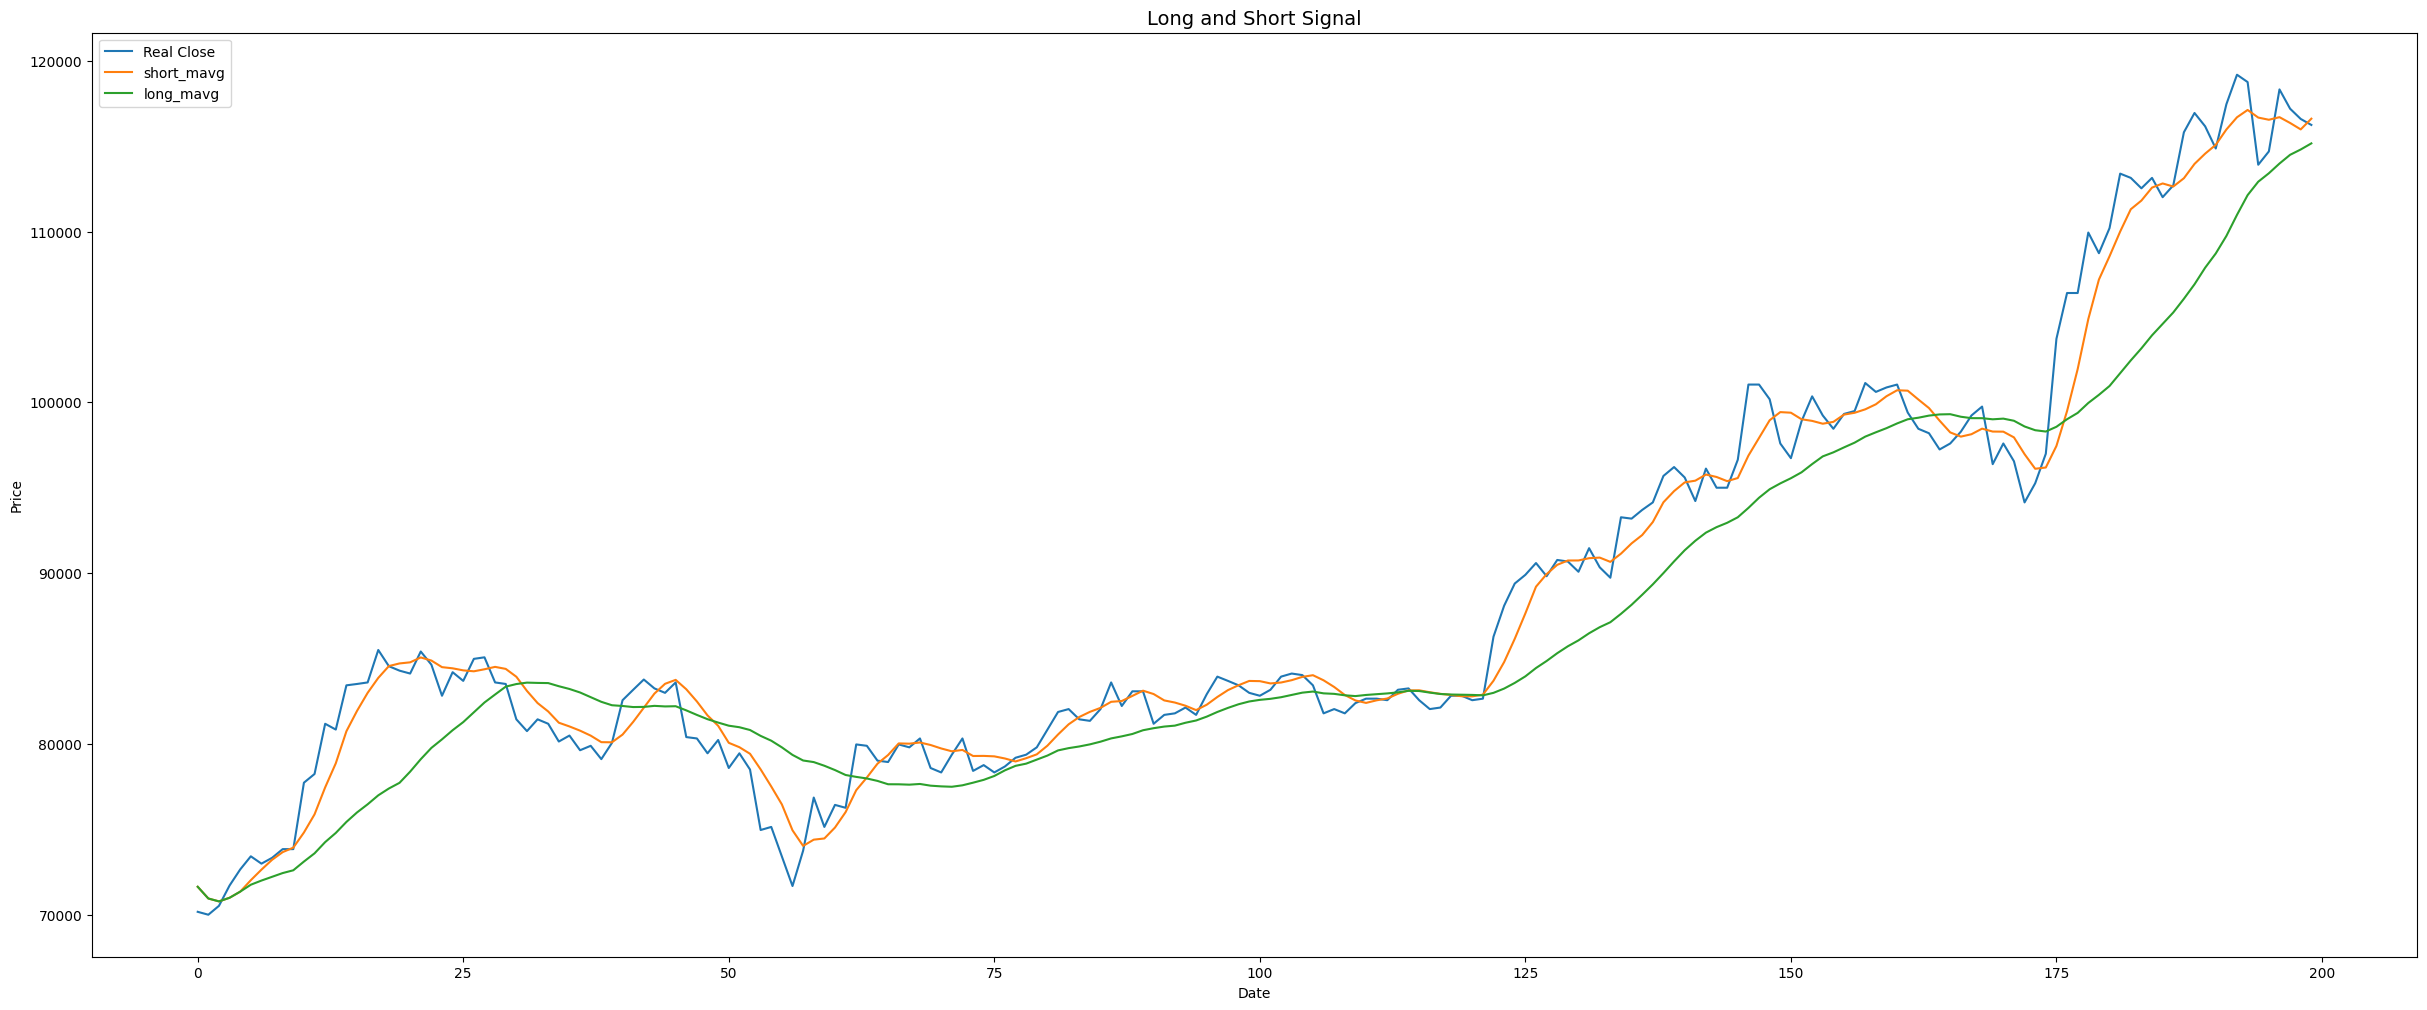

In [49]:
plt.subplots(figsize =(30,12))
plt.title('Long and Short Signal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(y_test['Close'], label='Real Close')
plt.plot(y_test['short_mavg'], label='short_mavg')
plt.plot(y_test['long_mavg'], label='long_mavg')
plt.legend()
plt.show()

In [50]:
mse2 = np.mean(np.square(np.array([true_price_test]) - np.array([predicted_price_test])))
print(mse2)

5851089.855059815


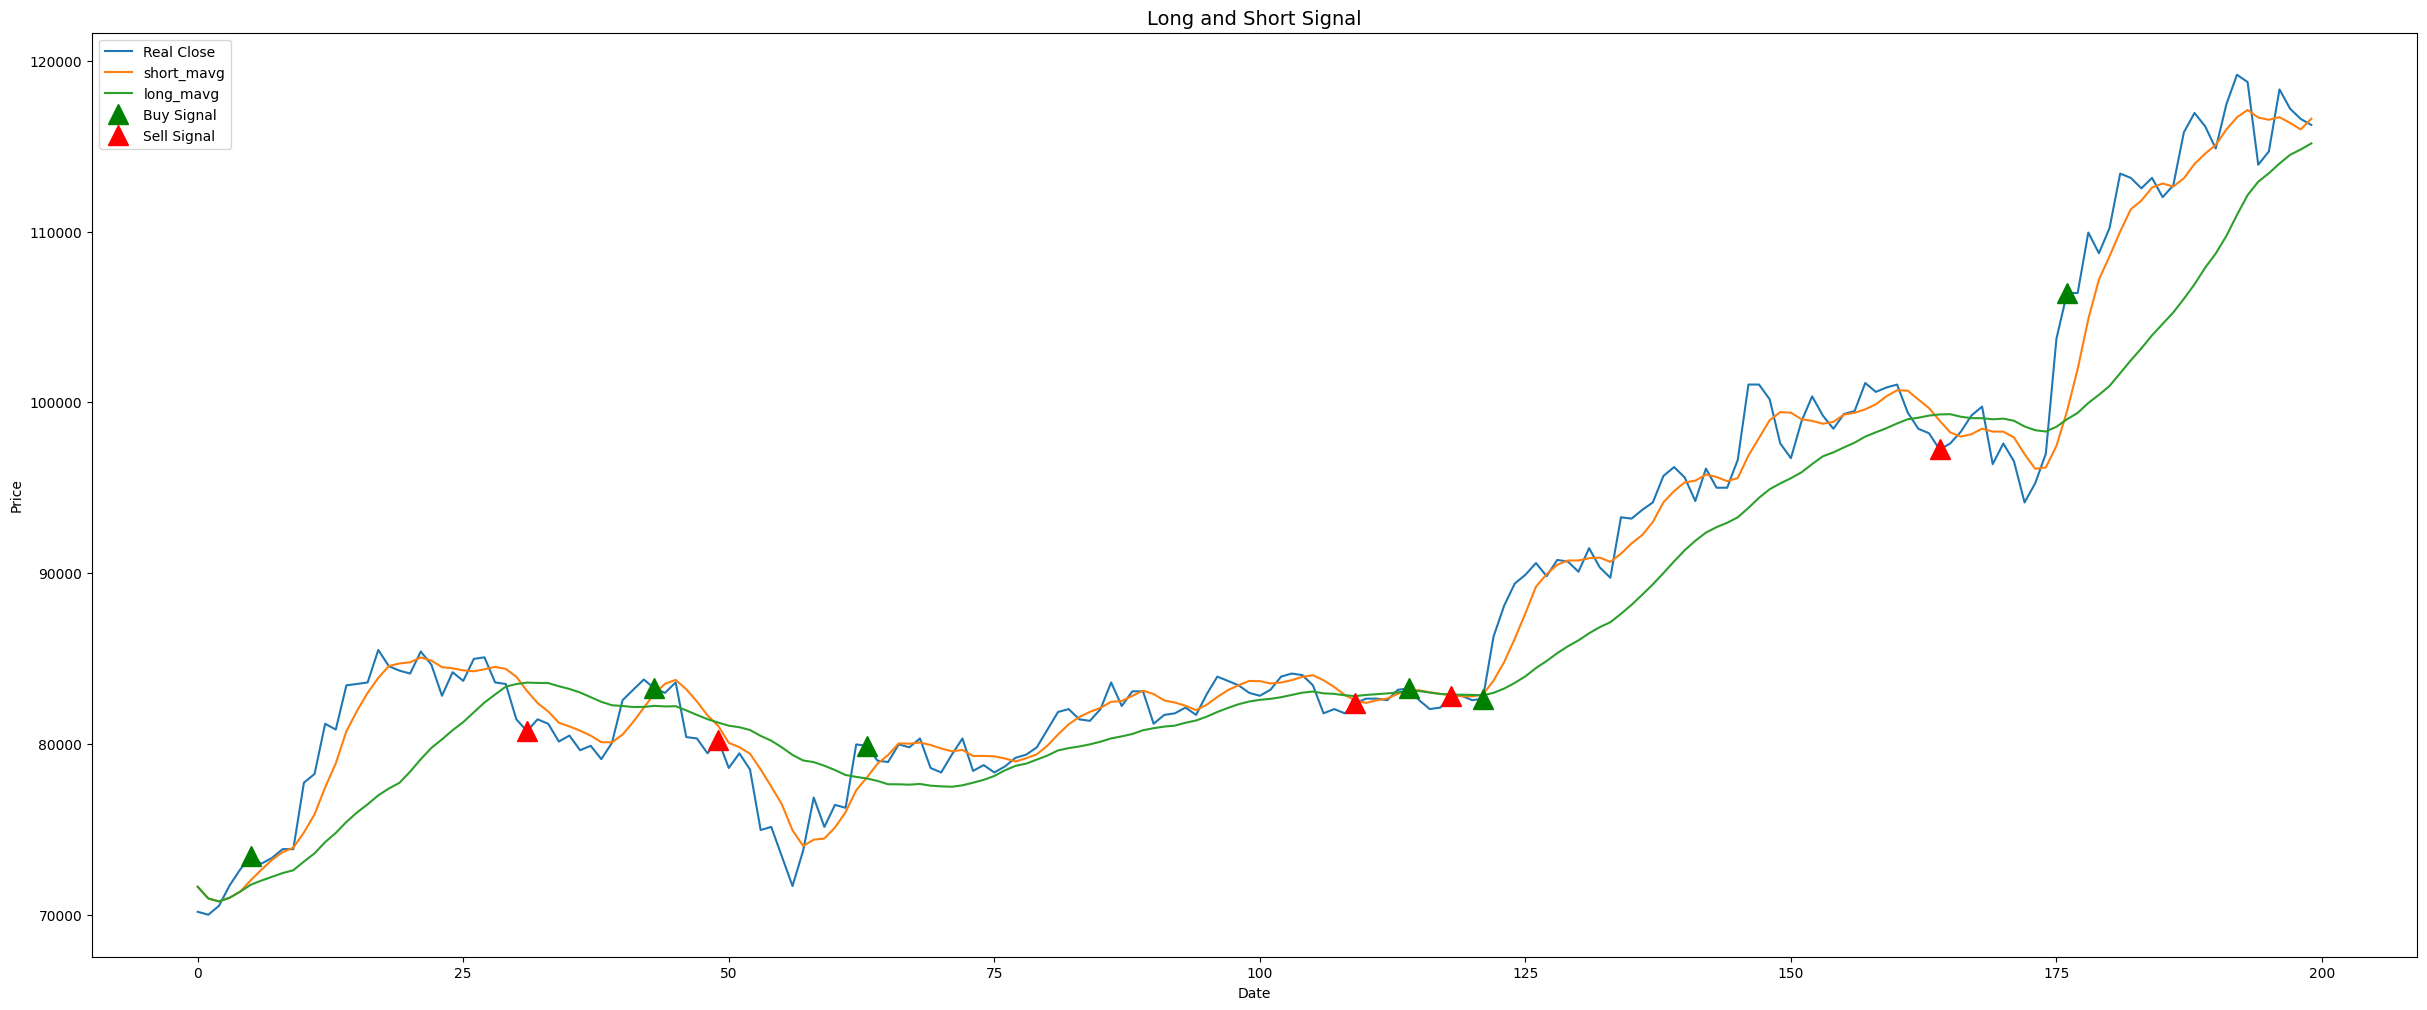

In [51]:
plt.subplots(figsize =(30,12))
plt.title('Long and Short Signal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(y_test['Close'], label='Real Close')
plt.plot(y_test['short_mavg'], label='short_mavg')
plt.plot(y_test['long_mavg'], label='long_mavg')

plt.plot(buy_points_test.index, y_test['Close'][buy_points_test.index],
'^', ms=15, label='Buy Signal', color='green')
plt.plot(sell_points_test.index, y_test['Close'][sell_points_test.index],
'^', ms=15, label='Sell Signal', color='red')
plt.legend()
plt.show()

In [52]:
budget = 1e7
assets_test = [budget]
stocks_bought = 0
stocks_bought_history = [0]
for index, row in y_test.iterrows():
    if budget < 0:
        print("ERROR: Budget < 0")
        break
    if row['buy_points'] == 1:
        stocks_bought = (budget // y_test["Close"][index]) // 2
        budget -=  (stocks_bought * y_test["Close"][index])
    elif row['sell_points'] == 1:
        budget += stocks_bought * y_test["Close"][index]
        stocks_bought = 0
    assets_test.append((budget + stocks_bought * y_test["Close"][index]))

In [53]:
# budget = 1e7
# assets_test = [budget]
# stocks_bought = 0
# stocks_bought_history = [0]
# for index, row in y_test.iterrows():
#     if budget < 0:
#         print("ERROR: Budget < 0")
#         break
#     if row['sell_points'] == 1:
#         stocks_bought = (budget // y_test["Close"][index]) // 2
#         budget -=  (stocks_bought * y_test["Close"][index])
#     elif row['buy_points'] == 1:
#         budget += stocks_bought * y_test["Close"][index]
#         stocks_bought = 0
#     assets_test.append((budget + stocks_bought * y_test["Close"][index]))

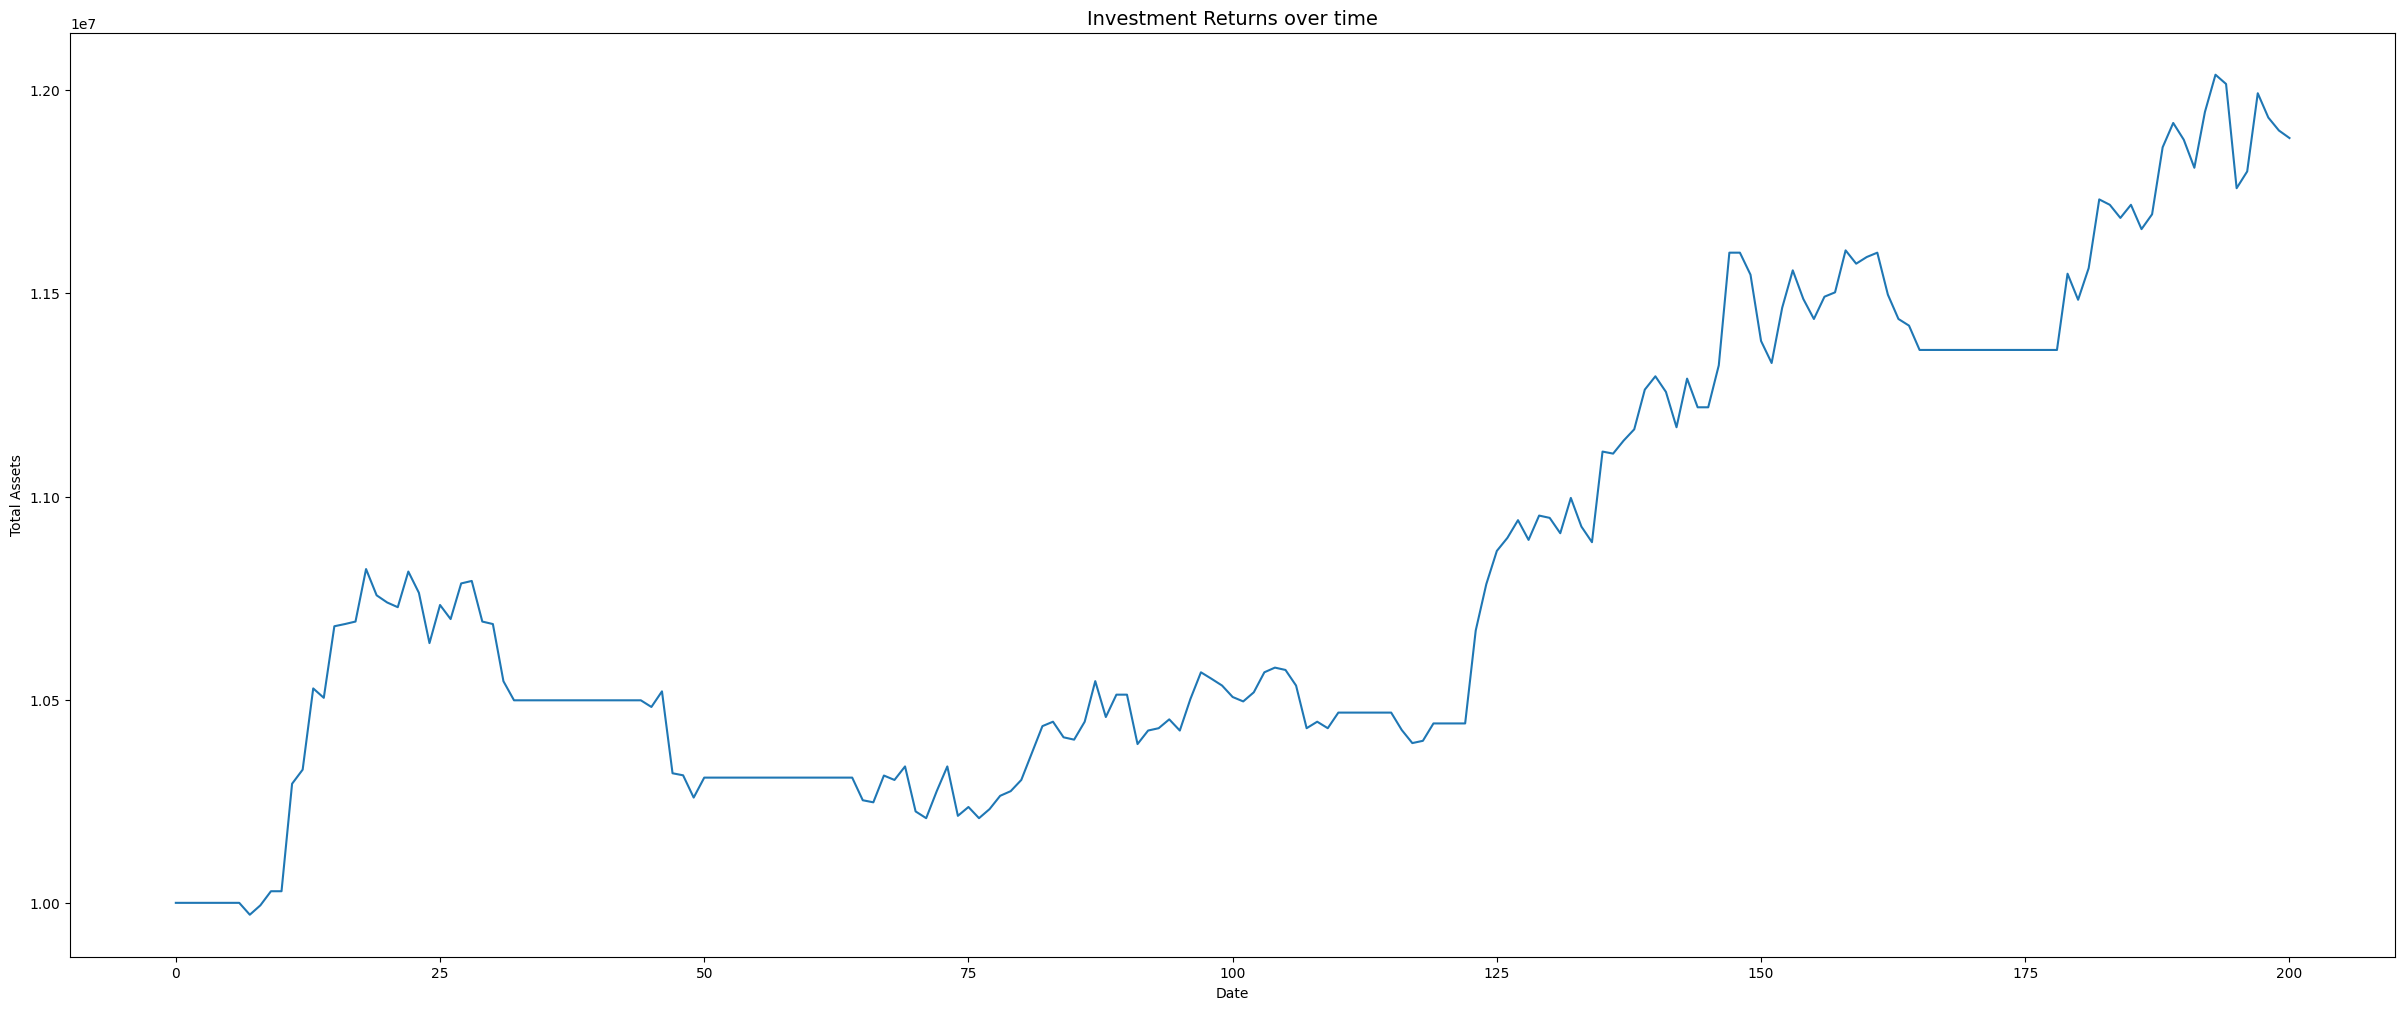

In [54]:
plt.subplots(figsize =(30,12))
plt.title('Investment Returns over time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Assets')
plt.plot(assets_test, label='Assets')
# plt.legend()

In [55]:
print(f"Returns: {(assets_test[-1] - assets_test[0])/assets_test[0] * 100}%")

Returns: 18.82209999999998%


In [56]:
(y_test['Close'][59] - y_test["Close"][0])/y_test["Close"][0] * 100

7.082798916916061

In [57]:
# MFI, EMA, WEEKLY , data points num